# Trabajo práctico N° 4
## Mellino, Natalia

In [ ]:
## Imports
# install.packages("adabag")
library("adabag")
library("randomForest")
library("e1071")
library("caret")

## Ejercicio 1

In [2]:
## Ejemplo
data("iris")
train <- c(sample(1:50, 25), sample(51:100, 25), sample(101:150, 25))
iris.adaboost <- boosting(Species ~ ., data=iris[train, ], mfinal=10, coef="Freund", control=rpart.control(maxdepth=3))
summary(iris.adaboost)

           Length Class   Mode     
formula      3    formula call     
trees       10    -none-  list     
weights     10    -none-  numeric  
votes      225    -none-  numeric  
prob       225    -none-  numeric  
class       75    -none-  character
importance   4    -none-  numeric  
terms        3    terms   call     
call         6    -none-  call     

In [2]:
load("TP4.Rdata", verbose=T)

Loading objects:
  esp_train
  RRL
  esp_test
  diag_test
  .Random.seed
  diag_train


### Espirales con ruido

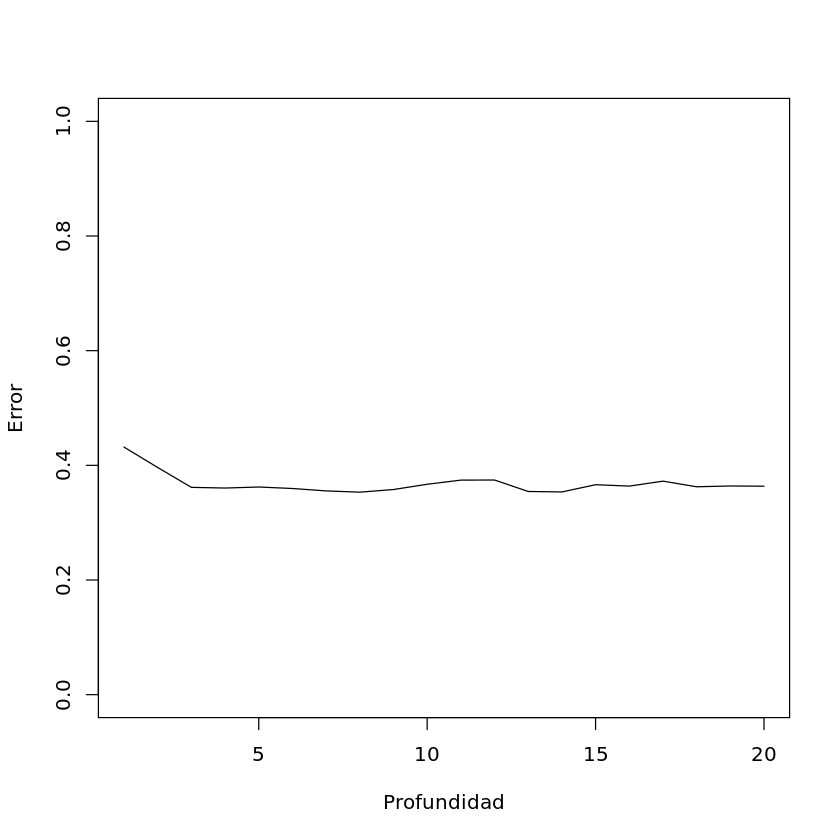

In [4]:
esp.errores <- c()
for(i in 1:20){
    esp.adaboost <- boosting(class ~ ., data=esp_train, mfinal=200, coef="Freund", control=rpart.control(maxdepth=i))
    pred <- predict(esp.adaboost, esp_test)
    esp.errores <- c(esp.errores, pred$error)
}

plot(c(1:20), esp.errores, type="l", xlab="Profundidad", ylab="Error", ylim=c(0,1))

#### Conclusiones

Vemos que el error se mantiene con muy poca variación, por lo que el nivel de profundidad no afecta demasiado al error de nuestro modelo. Sin embargo la performance no es buena para ningún valor, ya que estamos teniendo un error de mas o menos 40%. Lo que si podemos ver que el error es ligeramente mayor cuando el nivel de profundidad muy chico (entre 1 y 5). Habría que probar el dataset de espirales sin ruido y ver que tan suceptible es este método al mismo.

### Diagonal

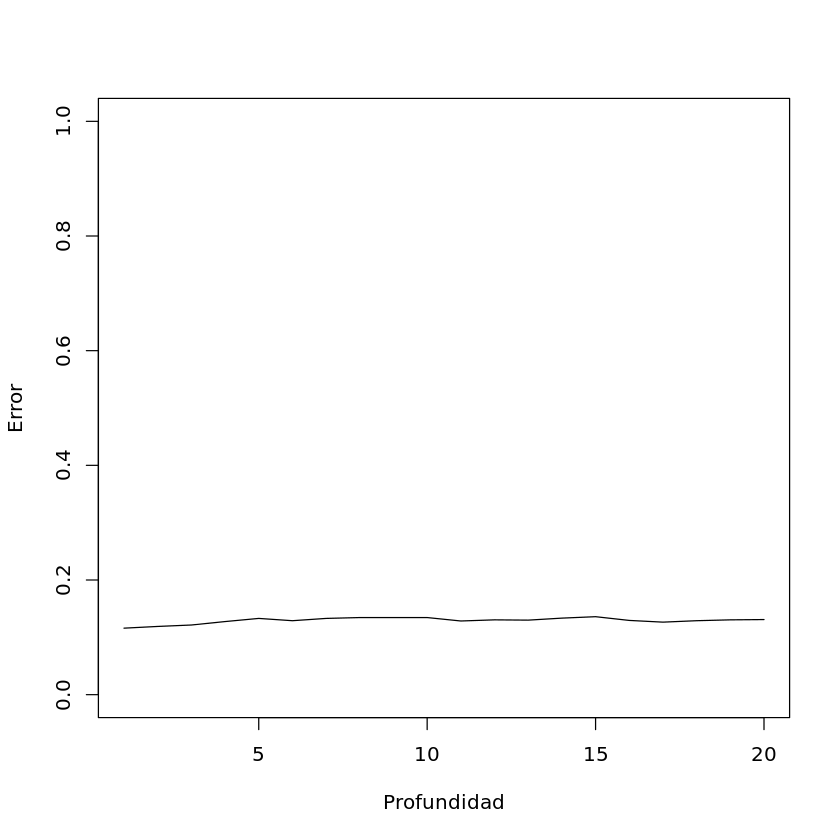

In [6]:
diag.errores <- c()
for(i in 1:20){
    diag.adaboost <- boosting(class ~ ., data=diag_train, mfinal=200, coef="Freund", control=rpart.control(maxdepth=i))
    pred <- predict(diag.adaboost, diag_test)
    diag.errores <- c(diag.errores, pred$error)
}

plot(c(1:20), diag.errores, type="l", xlab="Profundidad", ylab="Error", ylim=c(0,1))

#### Conclusiones

En este caso tenemos un error más bajo, podría decirse que aceptable. Lo que notamos acá a comparación del anterior es que la curva de error se mantiene bastante llana, sin grandes variaciones. El nivel de profundidad afecta menos que en el problema de las espirales con ruido.

## Ejercicio 2

In [15]:
head(RRL)

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,⋯,c89_m4,cnt,n09_c3,n09_hk_color,n09_jh_color,n09_jk_color,n09_m2,n09_m4,ppmb,Tipo
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.12125,0.6320207,1,0.2835821,26.96911,-2.053218e-08,0.594827064,0,1363382.6,0.21739130,⋯,15.60932,67,3.322270e-01,-1.150879e-02,3.124268e-01,0.3009180,15.73283,15.74282,0.209575117,0
2,0.11900,0.6567491,1,0.2794118,27.34302,3.789182e-09,0.594920127,0,1134045.3,0.10576923,⋯,15.79620,68,2.538926e-01,5.294659e-02,3.438380e-01,0.3967845,15.92177,15.93016,0.006674408,0
3,0.28200,1.0000000,1,0.2318841,3817.29126,-4.223939e+00,0.003960514,0,2425723.6,0.05839416,⋯,14.43619,69,2.392369e-01,7.562047e-02,3.703775e-01,0.4459980,14.57444,14.58119,0.166880861,0
4,0.04375,0.9999802,1,0.1818182,23.08996,-2.235318e-02,0.595819184,0,677993.1,0.21311475,⋯,13.21403,66,2.702403e-01,1.058040e-01,4.507252e-01,0.5565292,13.34951,13.35817,0.528596205,0
5,0.33000,0.4083999,1,0.2954545,27.73315,3.789182e-09,0.594920127,0,824000203.6,0.16428571,⋯,-12683.95082,132,2.718148e+04,-1.001544e+04,1.001586e+04,0.4185631,-9999.60320,-9158.22601,0.104860550,0
6,0.23450,0.4528910,1,0.3288591,27.32995,4.427833e-09,0.595191814,0,195875889.9,0.18137255,⋯,15.21148,149,3.472547e-01,9.518029e-02,5.111292e-01,0.6063095,15.42667,15.43705,2.093833499,0


In [11]:
mtrys <- c(69, 34, 17, 8, 4, 2, 1)
rrf.randomForest <- function() {
    oob.errores <- c()

    for (i in 1:7){
        errores.k <- c()
        for(j in 1:5) {
            rrf.model <- randomForest(RRL[, -70], RRL[, 70], mtry=mtrys[i], ntree=1000)
            oob.error <- rrf.model$err.rate[1000]
            errores.k <- c(errores.k, oob.error)
        }
        oob.errores <- c(oob.errores, mean(errores.k))
    }

    return(oob.errores)
}

In [12]:
rrf.errores <- rrf.randomForest()

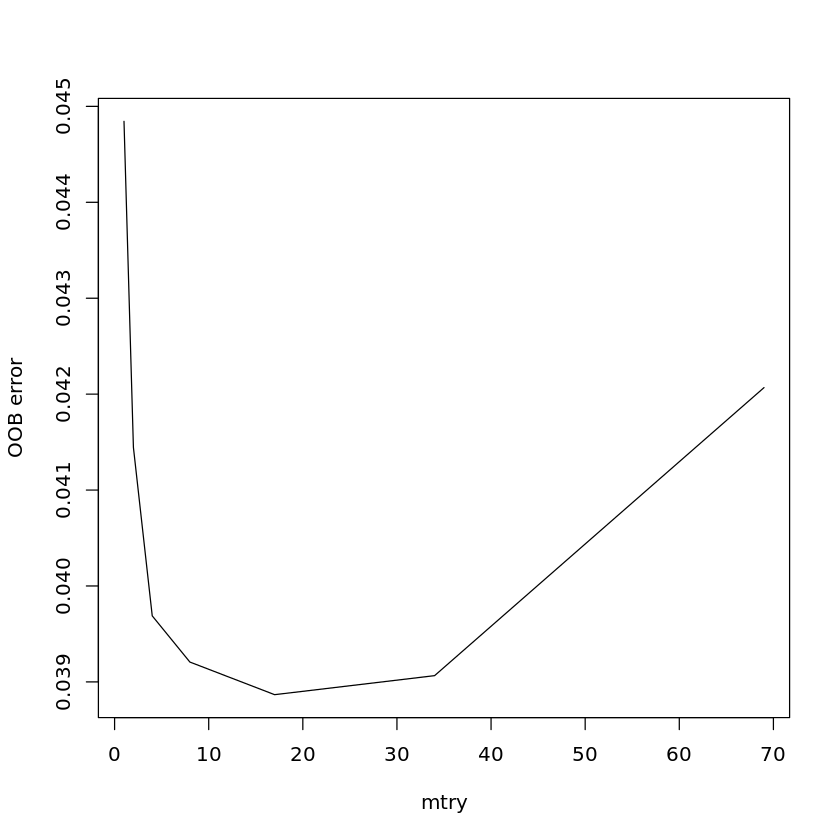

In [13]:
plot(mtrys, rrf.errores, type="l", xlab="mtry", ylab="OOB error")

### Conclusiones

Podemos ver que el error decrece entre los valores 1 a 8 pero luego comienza a crecer de vuelta rápidamente. Sin embargo, al observar bien la gráfica nos damos cuenta de que tenemos un error entre 0.039 y 0.045, por lo que la diferencia no es significativa y logramos tener un error bastante bajo.

## Ejercicio 3

In [3]:
load("lampone.Rdata")
head(lampone)


,anno,m33,m34,m35,m36,m40,m41,m42,m43,m44,⋯,m183,m185,m187,m191,m193,m194,m195,m205,N_tipo,Numero
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
11,2006,32.24,0.27,0.06,0.01,0,0.30,0.02,2.05,0.11,⋯,0,0,0,0,0.01,0,0,0,2,2e
12,2006,33.41,0.34,0.05,0.01,0,0.12,0.02,10.42,0.25,⋯,0,0,0,0,0.02,0,0,0,2,2d
13,2006,31.93,0.32,0.05,0.01,0,0.09,0.02,9.32,0.24,⋯,0,0,0,0,0.01,0,0,0,2,2c
14,2006,43.62,0.45,0.08,0.02,0,0.11,0.02,12.67,0.31,⋯,0,0,0,0,0.02,0,0,0,2,2a
15,2006,47.08,0.47,0.09,0.02,0,0.20,0.03,3.19,0.12,⋯,0,0,0,0,0.02,0,0,0,2,2b
16,2006,21.38,0.20,0.03,0.00,0,0.06,0.01,12.01,0.27,⋯,0,0,0,0,0.01,0,0,0,2,2i


In [4]:
lampone.vars <- lampone[, -c(1, 143, 144)] # La clase esta en 1 y 143, sacamos la 144 porque da error


Random Forest

In [10]:
lampone.rf <- randomForest(lampone.vars, lampone[, 143], ntree=1000, mtry=17)
lampone.rf.error <- lampone.rf$err.rate[1000]

Boosting con 5-fold cross validation

In [9]:
#Randomly shuffle the data
lampone.cv <- lampone[sample(nrow(lampone)),][, -c(1, 144)] # Sacamos las columnas que no sirven
folds <- cut(seq(1, nrow(lampone.cv)), breaks=5, labels=FALSE)

lampone.boosting.error.k <- c()

for(i in 1:5){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    testData <- lampone.cv[testIndexes, ]
    trainData <- lampone.cv[-testIndexes, ]

    lampone.adaboost <- boosting(N_tipo~., data=trainData, mfinal=100, coef="Freund", control=rpart.control(maxdepth=17))
    
    pred <- predict(lampone.adaboost, testData)
    lampone.boosting.error.k <- c(lampone.boosting.error.k, pred$error)
}

lampone.error.boosting <- mean(lampone.boosting.error.k)


SVM Polinomial con 5-cross validation

In [59]:
lampone.cv <- lampone[sample(nrow(lampone)),][, -c(1, 144)]
folds <- cut(seq(1, nrow(lampone.cv)), breaks=5, labels=FALSE)

lampone.svm.pol.errork <- c()

for(i in 1:5){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    testData <- lampone.cv[testIndexes, ]
    trainData <- lampone.cv[-testIndexes, ]

    lampone.svm.pol <- svm(N_tipo~., trainData, kernel="polynomial", degree=3)

    df.pred <- testData[ , !(names(testData) %in% c("N_tipo"))]
    pred <- predict(lampone.svm.pol, df.pred)
    tab <- table(pred = pred, true = testData[ , c("N_tipo")])
    
    error <- 1 - sum(pred == testData[ , c("N_tipo")]) / length(pred)
    lampone.svm.pol.errork <- c(lampone.svm.pol.errork, error)
}

lampone.svm.pol.error <- mean(lampone.svm.pol.errork)

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘m40’ and ‘m104’ and ‘m128’ and ‘m142’ and ‘m150’ and ‘m152’ and ‘m158’ and ‘m159’ and ‘m161’ and ‘m165’ and ‘m176’ and ‘m178’ and ‘m179’ and ‘m181’ and ‘m183’ and ‘m205’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘m40’ and ‘m104’ and ‘m110’ and ‘m128’ and ‘m132’ and ‘m140’ and ‘m142’ and ‘m150’ and ‘m152’ and ‘m158’ and ‘m159’ and ‘m161’ and ‘m163’ and ‘m165’ and ‘m176’ and ‘m178’ and ‘m179’ and ‘m181’ and ‘m185’ and ‘m187’ and ‘m191’ and ‘m205’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘m40’ and ‘m104’ and ‘m128’ and ‘m142’ and ‘m150’ and ‘m152’ and ‘m158’ and ‘m159’ and ‘m161’ and ‘m165’ and ‘m173’ and ‘m176’ and ‘m178’ and ‘m179’ and ‘m181’ and ‘m205’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scal

SVM Radial Basis Function con 5-cross validation

In [ ]:
lampone.cv <- lampone[sample(nrow(lampone)),][, -c(1, 144)]
folds <- cut(seq(1, nrow(lampone.cv)), breaks=5, labels=FALSE)

lampone.svm.rbf.errork <- c()

for(i in 1:5){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    testData <- lampone.cv[testIndexes, ]
    trainData <- lampone.cv[-testIndexes, ]

    lampone.svm.rbf <- svm(N_tipo~., trainData, kernel="radial", gamma=10^(-7), cost=10^7)

    df.pred <- testData[ , !(names(testData) %in% c("N_tipo"))]
    pred <- predict(lampone.svm.rbf, df.pred)
    tab <- table(pred = pred, true = testData[ , c("N_tipo")])
    
    error <- 1 - sum(pred == testData[ , c("N_tipo")]) / length(pred)
    lampone.svm.rbf.errork <- c(lampone.svm.rbf.errork, error)
}

lampone.svm.rbf.error <- mean(lampone.svm.rbf.errork)

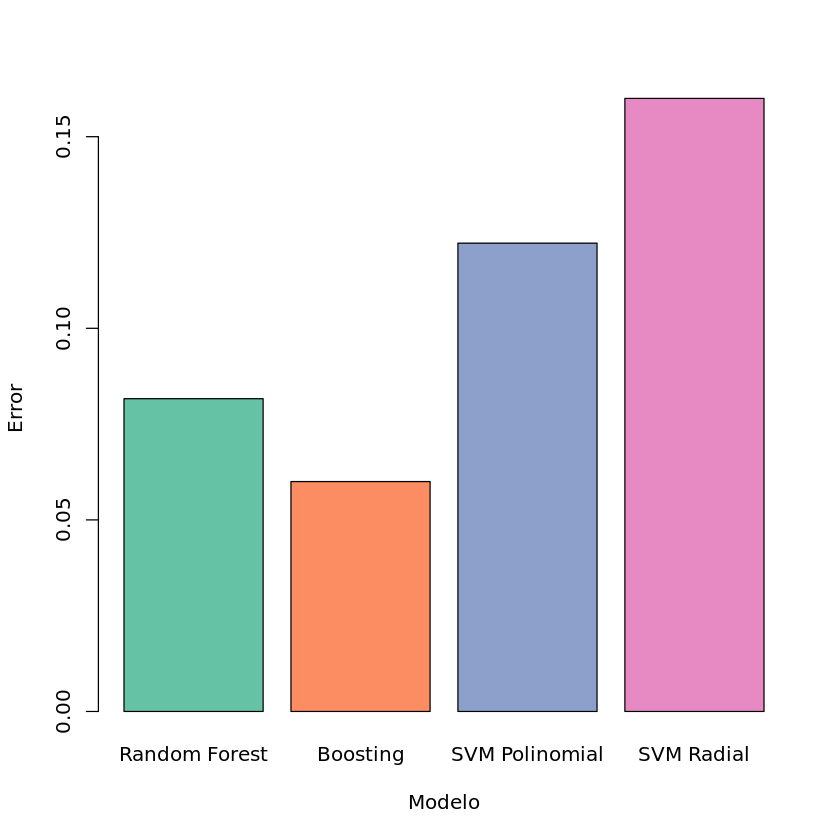

In [60]:
results <- data.frame("Modelo" = c("Random Forest", "Boosting", "SVM Polinomial", "SVM Radial"),
                      "Error" = c(lampone.rf.error, lampone.error.boosting, lampone.svm.pol.error, lampone.svm.rbf.error)
            )

# Creamos un gráfico de barras
library(RColorBrewer)
coul <- brewer.pal(5, "Set2")
barplot(height=results$Error, names.arg=results$Modelo, xlab="Modelo", ylab="Error", col=coul)           

#### Conclusiones

- Random Forest y Boosting fueron los que mejores resultados nos dieron, siendo este último el mejor de todos.
- Para SVM Polinomial intentamos jugar con el parámetro C y probar varias combinaciones de grados y valores de C pero el mejor resultado lo logramos con el valor por defecto de C = 1 y grado = 3.
- Para RBF fue particularmente complicado hallar una combinación de los parámetros C y gamma que nos diera un buen resultado. La mayoría de las veces estabamos frente a un error de entre 40% y 60%, pero vimos que con un gamma muy chico y un C muy grande se lograba una disminución considerable del error, no es tan buena, pero es mejor que algo que da 50% de error.
- De todo lo visto arriba podríamos decir que los métodos de kernel no funcionan tan bien sobre este dataset ya que resulta complicado ajustar los parámetros y aún así no se logra un muy buen resultado.


## Ejercicio 4